In [ ]:
pip install torch librosa matplotlib numpy scipy


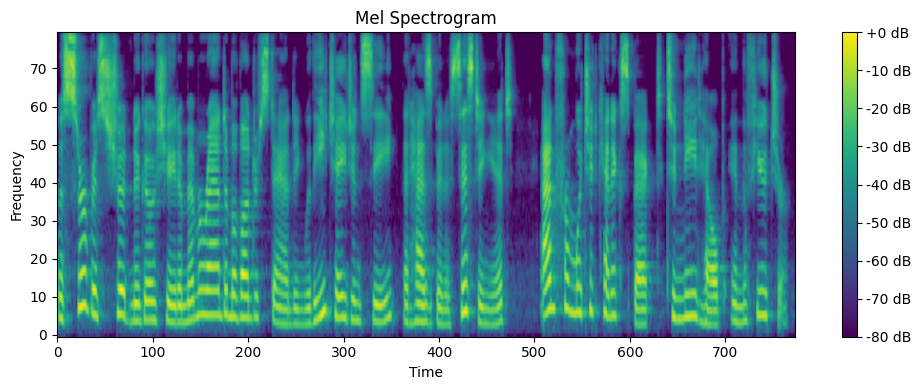

In [ ]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_audio(file_path, sr=22050, n_mfcc=13, n_fft=1024, hop_length=256, win_length=1024):
    # Load audio file
    audio, _ = librosa.load(file_path, sr=sr)

    # Generate Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=80, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

    # Convert to dB scale for better perceptual quality
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    return mel_spectrogram

# Example usage
audio_path = "/content/LJ050-0268.wav"
mel_spec = preprocess_audio(audio_path)

# Visualize the Mel Spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spec, aspect='auto', origin='lower')
plt.title("Mel Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()


In [ ]:
import re

def preprocess_text(text):
    # Lowercase the text and remove non-alphabet characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Example usage
text = "Hello, this is a text to speech demo!"
processed_text = preprocess_text(text)
print(processed_text)


hello this is a text to speech demo


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class Tacotron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Tacotron, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Embedding(input_dim, hidden_dim),
            nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        )

        # Decoder (for Mel spectrogram generation)
        self.decoder = nn.Sequential(
            nn.LSTM(hidden_dim, hidden_dim, batch_first=True),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, text_input):
        # Encoding the text
        encoded_text, _ = self.encoder(text_input)

        # Decoding into Mel spectrogram
        mel_spectrogram = self.decoder(encoded_text)

        return mel_spectrogram

# Example usage
input_dim = 28  # Number of unique characters (including special tokens)
hidden_dim = 512
output_dim = 80  # Mel Spectrogram size (80 Mel bands)

# Initialize model
model = Tacotron(input_dim, hidden_dim, output_dim)


In [ ]:
# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
def text_to_sequence(text, char_to_idx):
    # Convert text to lowercase and tokenize
    text = text.lower()
    tokens = [char_to_idx[char] for char in text if char in char_to_idx]
    return torch.tensor(tokens).unsqueeze(0)  # Add batch dimension


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class Tacotron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Tacotron, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Embedding(input_dim, hidden_dim),
            nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        )

        # Decoder (for Mel spectrogram generation)
        self.decoder = nn.Sequential(
            nn.LSTM(hidden_dim, hidden_dim, batch_first=True),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, text_input):
        # Encoding the text
        encoded_text, _ = self.encoder(text_input)

        # Decoding into Mel spectrogram
        # Get the output sequence from the LSTM (the first element of the tuple)
        decoder_output, _ = self.decoder[0](encoded_text)
        # Pass the output sequence to the Linear layer
        mel_spectrogram = self.decoder[1](decoder_output)

        return mel_spectrogram

# Example usage
input_dim = 28  # Number of unique characters (including special tokens)
hidden_dim = 512
output_dim = 80  # Mel Spectrogram size (80 Mel bands)

# Initialize model
model = Tacotron(input_dim, hidden_dim, output_dim)


In [ ]:
import librosa
import librosa.display
import soundfile as sf
import torch # Import torch for creating sample data

def mel_to_audio(mel_spectrogram, sr=22050, n_fft=1024, hop_length=256):
    # Convert Mel spectrogram to magnitude spectrogram
    mel_to_mag = librosa.feature.inverse.mel_to_stft(mel_spectrogram, sr=sr, n_fft=n_fft)

    # Apply Griffin-Lim to convert magnitude spectrogram to waveform
    waveform = librosa.griffinlim(mel_to_mag, hop_length=hop_length)
    return waveform

# Example: Convert generated Mel spectrogram to audio
# Create some sample data for the generated Mel spectrogram
# Replace this with your actual generated Mel spectrogram
generated_mel = torch.randn(1, 80, 100)  # Example shape: (batch_size, mel_bands, time_steps)

waveform = mel_to_audio(generated_mel.squeeze().cpu().numpy())

# Save the waveform to an audio file
sf.write("generated_audio.wav", waveform, samplerate=22050)
print("Audio generated and saved as 'generated_audio.wav'")

Audio generated and saved as 'generated_audio.wav'


In [ ]:
import IPython.display as ipd
ipd.Audio("generated_audio.wav")
